<a href="https://colab.research.google.com/github/rsoaresp/bandits_notebooks/blob/master/simple_epsilon_greedy_mab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Sutton & Barto](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf) is a good source to understand multi armed bandits, the main source used to write the code bellow.

In [0]:
import numpy as np
from matplotlib.pylab import plt

In [0]:
class Bandit:
  def __init__(self, num_arms: int):
    self.num_arms = num_arms
    self.avg_arms = self.set_arms_mean_location()

  def set_arms_mean_location(self):
    return np.random.normal(loc = 0, scale = 1.0, size = self.num_arms)

  def reward(self, arm_number):
    return np.random.normal(loc = self.avg_arms[arm_number], scale = 1, size = 1)

In [0]:
class EpsilonGreedy:
  def __init__(self, num_steps, epsilon):
    self.epsilon = epsilon
    self.num_steps = num_steps

  def run_sim(self, bandit):

    reward = np.zeros(self.num_steps)
    best_arm = np.zeros(self.num_steps, dtype=int)

    num_pulls = np.zeros(bandit.num_arms)
    arms_estimate = np.zeros(bandit.num_arms)

    for i in range(0, self.num_steps):

      best_arm[i] = self.select_arm(bandit, arms_estimate)

      num_pulls[best_arm[i]] += 1
      reward[i] = bandit.reward(best_arm[i])
      arms_estimate[best_arm[i]] += (reward[i] - arms_estimate[best_arm[i]])/num_pulls[best_arm[i]]

    return reward

  def select_arm(self, bandit, arms_estimate):
      if np.random.random() < self.epsilon:
        return np.random.randint(0, bandit.num_arms)
      else:
        return np.random.choice(np.where(arms_estimate == arms_estimate.max())[0])

# Performs some simple numerical experiments

Text(0, 0.5, '$\\langle$ reward $\\rangle$')

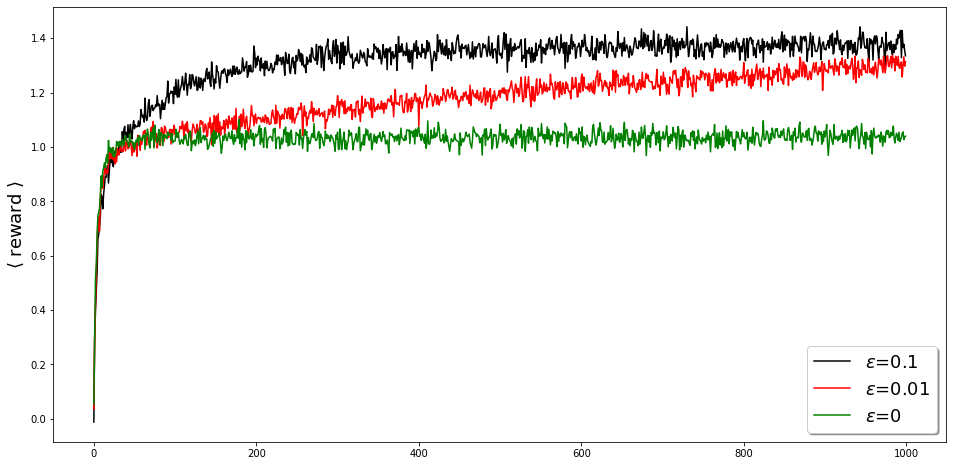

In [4]:
fig, ax = plt.subplots(figsize = (16,8))
g = EpsilonGreedy(1000, 0.1)
reward = np.zeros(1000)
for i in range(0, 2000):
  b = Bandit(10)
  reward += g.run_sim(b);

ax.plot(reward/2000, 'k-', label=r'$\epsilon$=0.1')

g = EpsilonGreedy(1000, 0.01)
reward = np.zeros(1000)
for i in range(0, 2000):
  b = Bandit(10)
  reward += g.run_sim(b);

ax.plot(reward/2000, 'r-', label=r'$\epsilon$=0.01')

g = EpsilonGreedy(1000, 0)
reward = np.zeros(1000)
for i in range(0, 2000):
  b = Bandit(10)
  reward += g.run_sim(b);

ax.plot(reward/2000, 'g-', label=r'$\epsilon$=0')

ax.legend(loc=0, fancybox=True, shadow=True, fontsize=18)
plt.ylabel(r'$\langle$ reward $\rangle$', fontsize = 18)